In [67]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Prédiction des ventes de produits : 
Utiliser des données de ventes pour prévoir les ventes futures en utilisant des modèles de régression ou de machine learning.

Objectifs : [Prédiction des ventes hebdomadaires/mensuelles] et/ou [Analyse des produits et catégories ayant les meilleures performances]

In [68]:
test_df = pd.read_csv("Data/Test.csv")
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## A faire

### Etape du pré-processing :
- quelles sont les données manquantes
- leurs distributions au sein de la distrib global (seaborn)
- identifier les types de données (numeric, catégorique)
- déterminer ce qu'on va faire avec les données manquantes (supprimer, remplacer, etc.)

### Analyser les données :
- faire dataframe.describe() -> permet d'avoir mean, 1er quartile, max, etc.
- distribution des données : boxplot pour voir les outliers
- Visualisation des données numériques (histo -> densité de la fonction de distrib des données, plot, scatter plot, etc.)
- Visualisation des données catégoriques (pie chart, etc.)

Après avoir fait tout ça, effectuer une description des données (on a telles données, sa nature, si c des kg etc...)



ces étapes prennent le plus de temps !!

## Pré-processing :

### Informations générales

- 5681 entries
- 11 columns
- 9 columns non null and 2 columns null (Item_Weight : 976 & Outlet_Size : 1606)
- cette BDD comport uniquement les données où des oultets ont eu lieu; allant de 1985 à 2009

-> _Est-ce qu'il faut transformer la colonne Outlet_Establishment_Year en datetime year ?_  
pd.to_datetime(df.Year, format='%Y')

In [69]:
test_df['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004])

### Vérification des données
#### Remplacer reg par Regular & LF et low fat par Low Fat

In [70]:
test_df.replace({'reg': 'Regular', 'LF' : 'Low Fat', 'low fat' : 'Low Fat'}, inplace=True)

In [71]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Transformation des nan en np.nan dans la colonne Outlet Size

In [72]:
test_df.replace({'nan' : np.nan}, inplace=True)

### Analyse des données manquantes

#### calcul du % de données manquantes

In [87]:
missing_data = test_df.isnull().sum()

missing_percentage = (missing_data / len(test_df)) * 100
missing_percentage

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

- Item_Weight: 17.18% missing  
- Outlet_Size: 28.27% missing  
  
-> Item_Weight: maybe with the mean or the medial..  
-> Outlet_Size: maybe need a more profound analysis to understand what value with which characteristics.

#### Analyse des 2 types (categorical & numeric)

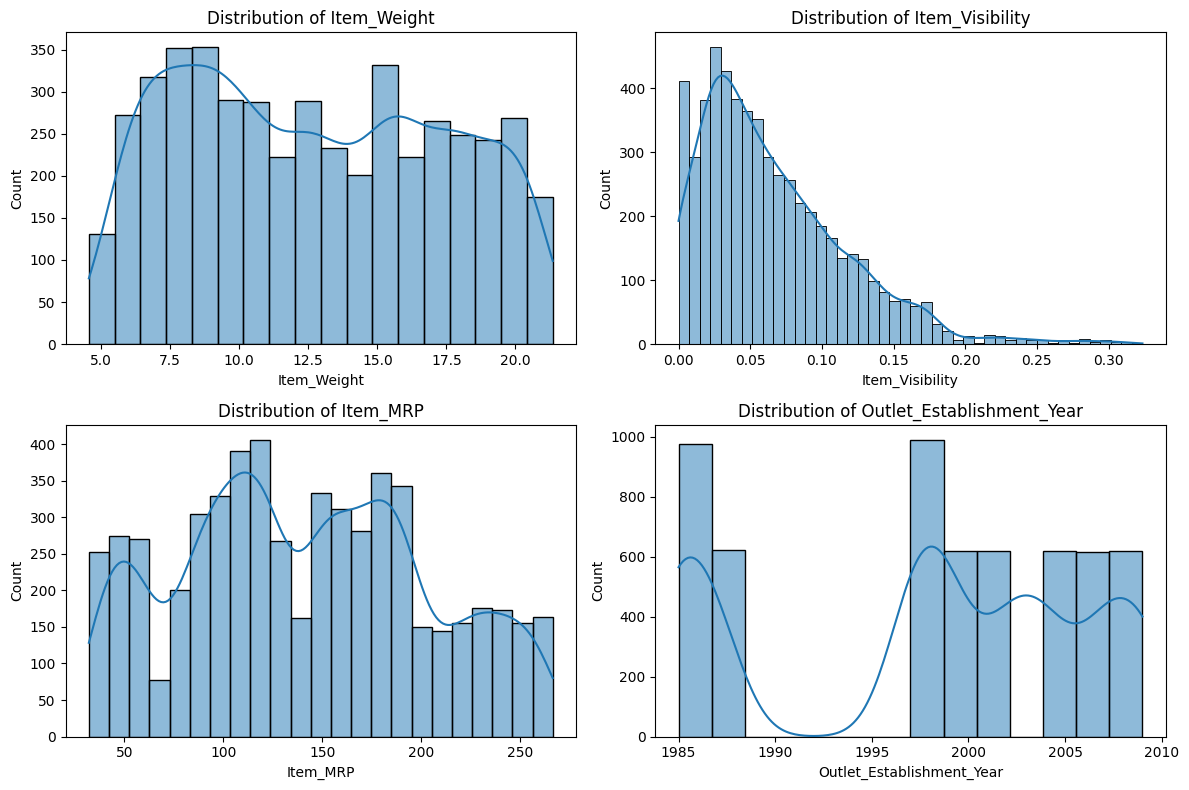

In [94]:
numeric = test_df.select_dtypes(include=['float64', 'int64']).columns
categorical = test_df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.histplot(test_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


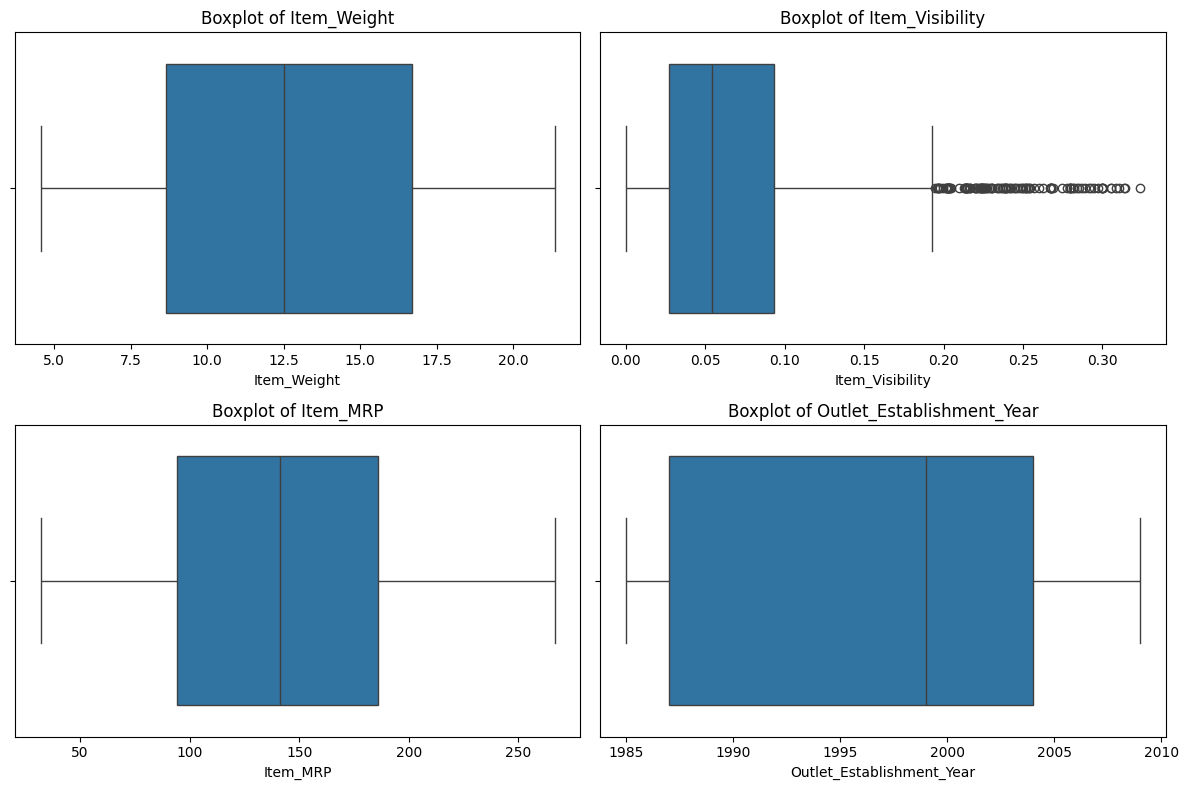

In [95]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=test_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


#### categorical

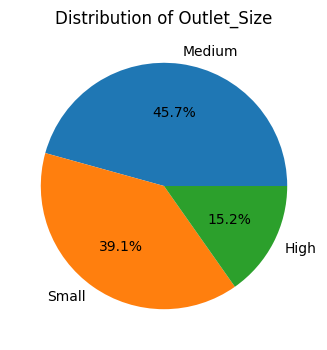

In [101]:
plt.figure(figsize=(8, 4))
test_df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%',title='Distribution of Outlet_Size')
plt.ylabel('')
plt.show()

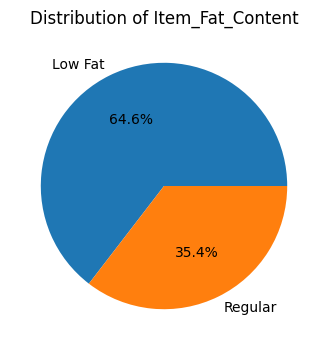

In [103]:
plt.figure(figsize=(8, 4))
test_df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%', title='Distribution of Item_Fat_Content')
plt.ylabel('')
plt.show()

#### Management des "missings values"

In [105]:
test_df['Item_Weight'].mean()

12.695633368756642

In [106]:
test_df['Item_Weight'].median()

12.5

##### Transformer les valeurs NaN par la médiane 

In [107]:
test_df['Item_Weight'].fillna(test_df['Item_Weight'].median(), inplace=True)

/var/folders/3l/blcp59h54pb9b_6fl9lrq88w0000gn/T/ipykernel_32142/2595311615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Item_Weight'].fillna(test_df['Item_Weight'].median(), inplace=True)


##### Transformer les valeurs NaN par la valeur la plus utilisée qui est ici "Medium"

In [108]:
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/3l/blcp59h54pb9b_6fl9lrq88w0000gn/T/ipykernel_32142/2677113347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0], inplace=True)


In [110]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Explication de chaque colonne

- Item_Identifier: unique ID for each item
- Item_Weight: Weight of each item
- Item_Fat_Content: indicates whether the item is 'regular' or 'low fat'
- Item_Visibility: didn't undersatnd - maybe the visibility of the product ? 
- Item_Type: category of the item
- Item_MRP: Price.. ? 
- Outlet_Identifier: ID for the outlet establishment ?
- Outlet_Establishment_Year: year where there was an outlet
- Outlet_Size: size of the outlet
- Outlet_Location_Type: location type of the outlet
- Outlet_Type: type of outlet